In [4]:
import evaluation

executable = evaluation.ROOT_DIR + "/openmp/bin/multilayer-game-of-life"

grid_sizes = [2048]
num_layers = 10
num_steps = 64

# 1 or 0 (true/false)
create_png = 0

threads2exec_time = {}

min_parallel_threads = 2
max_parallel_threads = 16
step_parallel_threads = 2
num_threads_list = [1] + list(range(min_parallel_threads, max_parallel_threads + 1, step_parallel_threads))

for grid_size in grid_sizes:
    threads2exec_time[grid_size] = {}
    for num_threads in num_threads_list:
        params = [str(grid_size), str(num_layers), str(num_steps), str(create_png)]
        print(f"Evaluating with {num_threads} threads and grid size {grid_size}x{grid_size}")
        environment = {"OMP_NUM_THREADS": str(num_threads)}
        threads2exec_time[grid_size][num_threads] = evaluation.mean_execution_time(executable, params, environment, repetitions=10, cwd=evaluation.ROOT_DIR + "/openmp")

Evaluating with 1 threads and grid size 2048x2048
Mean execution time: 23.67 seconds
Evaluating with 2 threads and grid size 2048x2048
Mean execution time: 15.13 seconds
Evaluating with 4 threads and grid size 2048x2048
Mean execution time: 11.26 seconds
Evaluating with 6 threads and grid size 2048x2048
Mean execution time: 10.72 seconds
Evaluating with 8 threads and grid size 2048x2048
Mean execution time: 10.53 seconds
Evaluating with 10 threads and grid size 2048x2048
Mean execution time: 9.59 seconds
Evaluating with 12 threads and grid size 2048x2048
Mean execution time: 9.23 seconds
Evaluating with 14 threads and grid size 2048x2048
Mean execution time: 9.24 seconds
Evaluating with 16 threads and grid size 2048x2048
Mean execution time: 9.14 seconds


Lowest mean execution time for 2048 grid size: 9.141 obtained with 16 number of threads


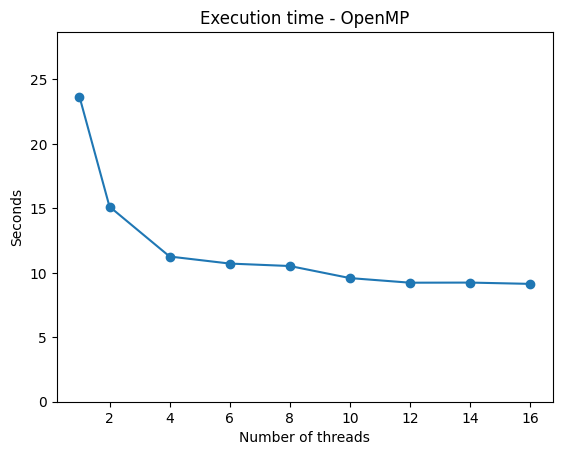

In [5]:
import matplotlib.pyplot as plt

for grid_size in grid_sizes:
      x = list(threads2exec_time[grid_size].keys())
      y = list(threads2exec_time[grid_size].values())

      # Creating the plot
      plt.plot(x, y, marker='o')

      print("Lowest mean execution time for {grid_size} grid size: {min_time:.3f} obtained with {threads} number of threads"
      .format(min_time = min(y), threads = min(threads2exec_time[grid_size], key = threads2exec_time[grid_size].get), grid_size = grid_size))

# Adding title and labels
plt.title('Execution time - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Seconds')
plt.ylim(0, max(y)+5)

# Displaying the plot
plt.show()



Max speedup with 2048 grid size: 2.589


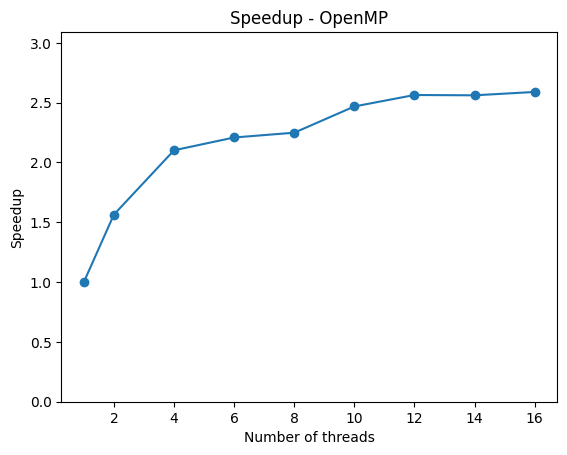

In [6]:
for grid_size in grid_sizes:
    x = list(threads2exec_time[grid_size].keys())
    y = [threads2exec_time[grid_size][1]/value for value in threads2exec_time[grid_size].values()]

    # Creating the plot
    plt.plot(x, y, marker='o')

    print(f"Max speedup with {grid_size} grid size: {max(y):.3f}")

# Adding title and labels
plt.title('Speedup - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.ylim(0, max(y)+0.5)

# Displaying the plot
plt.show()


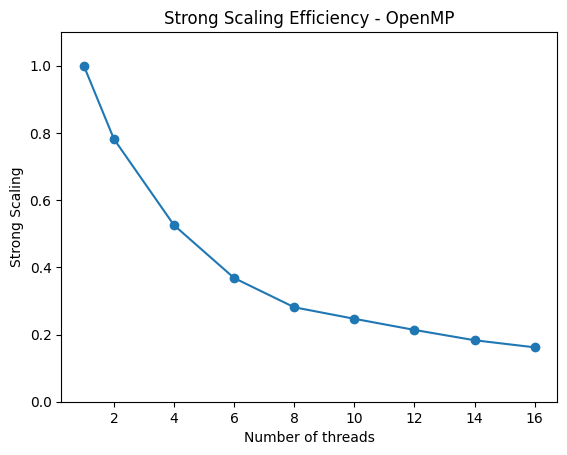

In [7]:
for grid_size in grid_sizes:
    x = list(threads2exec_time[grid_size].keys())
    y = [threads2exec_time[grid_size][1]/(p*value) for p, value in threads2exec_time[grid_size].items()]

    # Creating the plot
    plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Strong Scaling Efficiency - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Strong Scaling')
plt.ylim(0, max(y)+0.1)

# Displaying the plot
plt.show()